In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [11]:
x_train, x_test = x_train / 255.0, x_test / 255.0

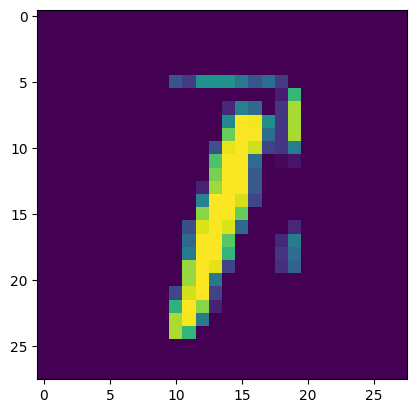

In [30]:
plt.imshow(x_train[67])

In [13]:
import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [20]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (28,28)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10,activation = 'softmax'))




In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 28, 128)           3712      
                                                                 
 dense_5 (Dense)             (None, 28, 64)            8256      
                                                                 
 dense_6 (Dense)             (None, 28, 10)            650       
                                                                 
Total params: 12618 (49.29 KB)
Trainable params: 12618 (49.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, 
                    epochs=5, 
                    batch_size=32, 
                    validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Display model summary
model.summary()


Epoch 1/5


2024-09-15 19:30:30.411936: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


1500/1500 [==============================] - 10s 6ms/step - loss: 0.2693 - accuracy: 0.9200 - val_loss: 0.1334 - val_accuracy: 0.9603
Epoch 2/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1115 - accuracy: 0.9660 - val_loss: 0.1070 - val_accuracy: 0.9663
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0752 - accuracy: 0.9773 - val_loss: 0.0916 - val_accuracy: 0.9723
Epoch 4/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0568 - accuracy: 0.9824 - val_loss: 0.0920 - val_accuracy: 0.9737
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0885 - accuracy: 0.9745
Test Loss: 0.088497593998909
Test Accuracy: 0.9745000004768372
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                      

In [34]:
model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


array([[1.57540008e-08, 9.84298458e-06, 1.63443066e-04, ...,
        9.97804880e-01, 8.46169542e-07, 5.24621064e-05],
       [1.02834815e-11, 4.48193560e-07, 9.99999464e-01, ...,
        1.09901129e-12, 5.65542169e-10, 4.08210122e-15],
       [4.58591444e-07, 9.99319375e-01, 6.54570977e-06, ...,
        1.50694977e-04, 3.65999207e-04, 4.41722676e-07],
       ...,
       [5.03425047e-13, 7.15641013e-09, 4.57152458e-12, ...,
        1.59260449e-09, 4.05190903e-08, 5.89783497e-07],
       [3.46341150e-10, 6.87942921e-13, 1.55319204e-12, ...,
        4.65378534e-11, 1.60142899e-05, 2.60816802e-11],
       [1.44125857e-11, 4.83104442e-13, 2.55864191e-10, ...,
        2.63162284e-17, 3.65782491e-12, 5.39811768e-15]], dtype=float32)

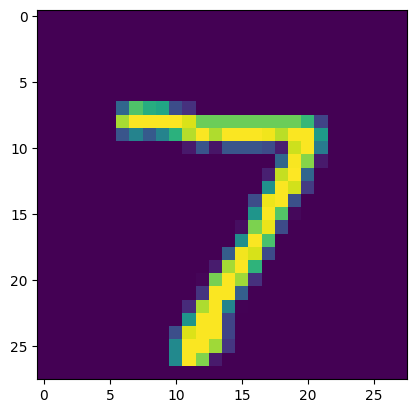

In [36]:
plt.imshow(x_test[0])

In [42]:
single_image = x_test[0]
single_image = np.expand_dims(single_image, axis=0)

model.predict(single_image).argmax(axis=1)[0]

1/1 [==============================] - 0s 28ms/step


7

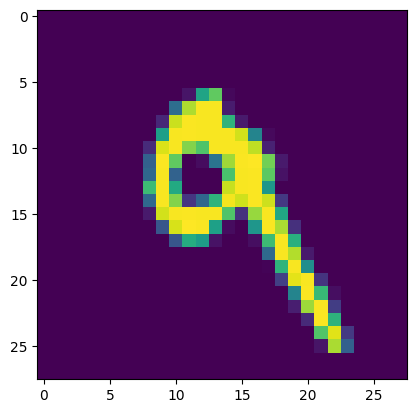

In [44]:
plt.imshow(x_test[7])

In [45]:
single_image = x_test[7]
single_image = np.expand_dims(single_image, axis=0)

model.predict(single_image).argmax(axis=1)[0]

1/1 [==============================] - 0s 26ms/step


9

In [4]:
# !pip install tensorflow opencv-python numpy


In [48]:
# Save the model to a file
model.save('digit_classfier.h5')  # HDF5 format


/home/rohan/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
import cv2
import numpy as np
import tensorflow as tf

# Load your trained model
model = tf.keras.models.load_model('digit_classfier.h5')

def preprocess_frame(frame):
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Resize the frame to the input size of the model (e.g., 28x28 for MNIST)
    resized_frame = cv2.resize(gray_frame, (28, 28))
    
    # Normalize the frame to [0, 1]
    normalized_frame = resized_frame / 255.0
    
    # Add batch dimension (1, 28, 28, 1)
    processed_frame = np.expand_dims(normalized_frame, axis=(0, -1))
    
    return processed_frame

def predict_and_display(frame, model):
    # Get frame dimensions
    height, width, _ = frame.shape

    # Define the region of interest (ROI) for digit detection (center of the frame)
    x_start = width // 4
    x_end = 3 * width // 4
    y_start = height // 4
    y_end = 3 * height // 4

    # Crop the ROI
    roi = frame[y_start:y_end, x_start:x_end]

    # Preprocess the cropped ROI
    processed_frame = preprocess_frame(roi)
    
    # Make prediction
    predictions = model.predict(processed_frame)
    predicted_class = predictions.argmax(axis=1)[0]
    print(predicted_class)
    
    # Draw a rectangle around the detected digit
    cv2.rectangle(frame, (x_start, y_start), (x_end, y_end), (0, 255, 0), 2)
    
    # Display the predicted class on the frame
    cv2.putText(frame, f'Prediction: {predicted_class}', (x_start, y_start - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    return frame

def main():
    # Initialize the camera
    cap = cv2.VideoCapture(0)  # 0 is usually the default camera
    
    if not cap.isOpened():
        print("Error: Could not open camera.")
        return
    
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break
        
        # Make prediction and display the result on the frame
        frame_with_prediction = predict_and_display(frame, model)
        
        # Display the frame
        cv2.imshow('Camera Feed', frame_with_prediction)
        
        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    # Release the camera and close windows
    cap.release()
    cv2.destroyAllWindows()

if __name__ == '__main__':
    main()


1/1 [==============================] - 0s 188ms/step
6
1/1 [==============================] - 0s 20ms/step
6
1/1 [==============================] - 0s 25ms/step
6
1/1 [==============================] - 0s 30ms/step
6
1/1 [==============================] - 0s 25ms/step
6
1/1 [==============================] - 0s 21ms/step
6
1/1 [==============================] - 0s 21ms/step
6
1/1 [==============================] - 0s 22ms/step
6
1/1 [==============================] - 0s 20ms/step
6
1/1 [==============================] - 0s 19ms/step
6
1/1 [==============================] - 0s 19ms/step
6
1/1 [==============================] - 0s 23ms/step
6
1/1 [==============================] - 0s 19ms/step
6
1/1 [==============================] - 0s 19ms/step
6
1/1 [==============================] - 0s 20ms/step
6
1/1 [==============================] - 0s 19ms/step
6
1/1 [==============================] - 0s 19ms/step
6
1/1 [==============================] - 0s 19ms/step
6
1/1 [======================